In [16]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

In [11]:
data = pl.scan_csv("cleaned_movie_data.csv")

In [12]:
data.schema

OrderedDict([('movieId', Int64),
             ('userId', Int64),
             ('rating', Float64),
             ('Title', String),
             ('Year', Int64),
             ('Rated', String),
             ('Runtime', Int64),
             ('Director', String),
             ('Actors', String),
             ('Plot', String),
             ('Language', String),
             ('Country', String),
             ('Poster', String),
             ('imdbRating', Float64),
             ('Type', String),
             ('Genres', String)])

In [13]:
movie_data = data.collect()
movie_data

movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,i64,f64,str,i64,str,i64,str,str,str,str,str,str,f64,str,str
256,209929,1.0,"""Junior""",1994,"""PG-13""",109,"""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie""","""Comedy, Romanc…"
6539,238309,5.0,"""Pirates of the…",2003,"""PG-13""",143,"""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie""","""Action, Advent…"
94677,186814,5.0,"""Dictator""",2016,"""Not Rated""",155,"""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie""","""Action, Drama"""
71535,225147,5.0,"""Zombieland""",2009,"""R""",88,"""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie""","""Action, Comedy…"
87222,45226,4.0,"""Kung Fu Panda …",2011,"""PG""",90,"""Jennifer Yuh N…","""Jack Black, An…","""Po and his fri…","""English, Russi…","""United States,…","""https://m.medi…",7.2,"""movie""","""Animation, Act…"
4718,74971,2.5,"""American Pie 2…",2001,"""R""",108,"""J.B. Rogers""","""Jason Biggs, S…","""Jim and his fr…","""English""","""United States""","""https://m.medi…",6.4,"""movie""","""Comedy"""
48394,262586,4.5,"""Pan's Labyrint…",2006,"""R""",118,"""Guillermo del …","""Ivana Baquero,…","""In the Falangi…","""Spanish""","""Mexico, Spain""","""https://m.medi…",8.2,"""movie""","""Drama, Fantasy…"
180,248601,3.0,"""Mallrats""",1995,"""R""",94,"""Kevin Smith""","""Shannen Dohert…","""Both dumped by…","""English""","""United States""","""https://m.medi…",7.0,"""movie""","""Comedy, Romanc…"
37741,13101,3.0,"""Capote""",2005,"""R""",114,"""Bennett Miller…","""Philip Seymour…","""In 1959, Truma…","""English""","""United States,…","""https://m.medi…",7.3,"""movie""","""Biography, Cri…"


In [14]:
movie_data.columns

['movieId',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type',
 'Genres']

In [15]:
movie_data.null_count()

movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


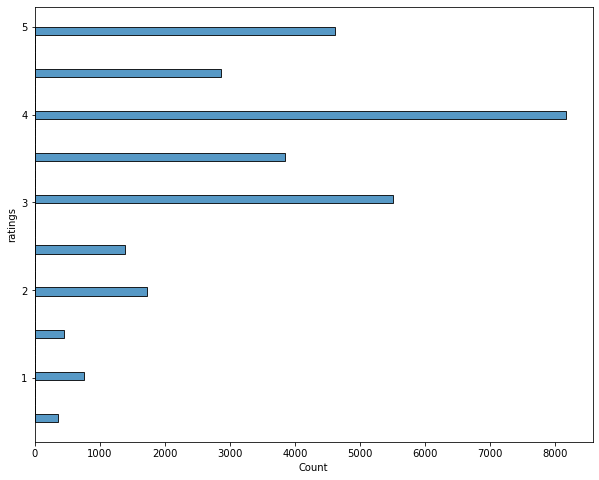

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(y=movie_data['rating'].to_numpy())
plt.ylabel('ratings')
plt.show()

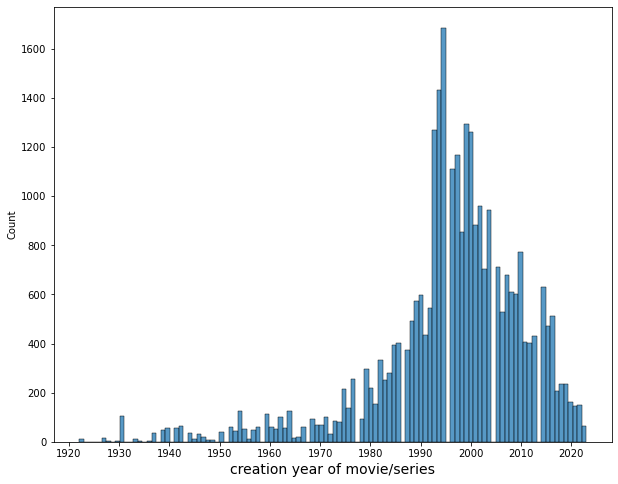

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(movie_data['Year'].to_numpy())
plt.xlabel("creation year of movie/series",fontsize=14)
plt.xticks(np.arange(1920,2030,10))
plt.show()

more movies were produced mainly in late 90's and early 2000's, movies available also depend on if users have watched, in these times the internet and colored television just came out

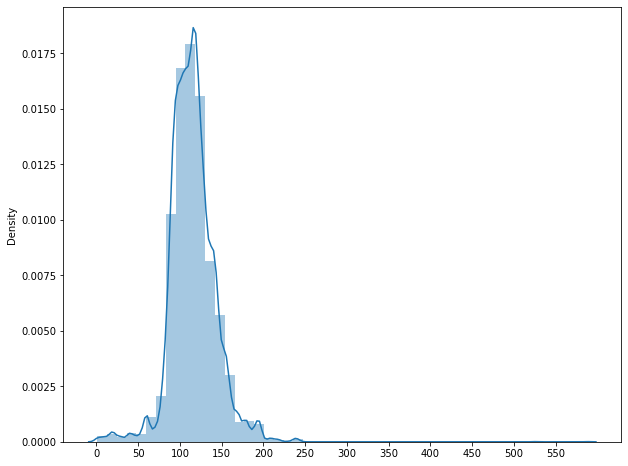

In [29]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,8))
sns.distplot(movie_data['Runtime'].to_numpy())
plt.xticks(np.arange(0,600,50))
plt.show()

In [30]:
movie_data['Runtime'].mean()

115.33694883282244

Movies average over 100mins that's from an 1h40m to 2h

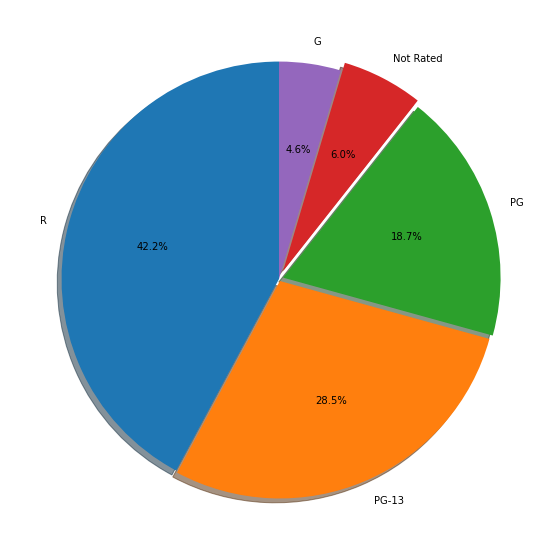

In [111]:
plt.figure(figsize=(12,10))
movie_data['Rated'].value_counts()[:5]
plt.pie(movie_data['Rated'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],labels=movie_data['Rated'].value_counts().sort(by='count',descending=True)['Rated'].to_numpy()[:5],
        explode=[0,0.01,0.02,0.04,0],autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

more adult movies are being created followed by childern movies

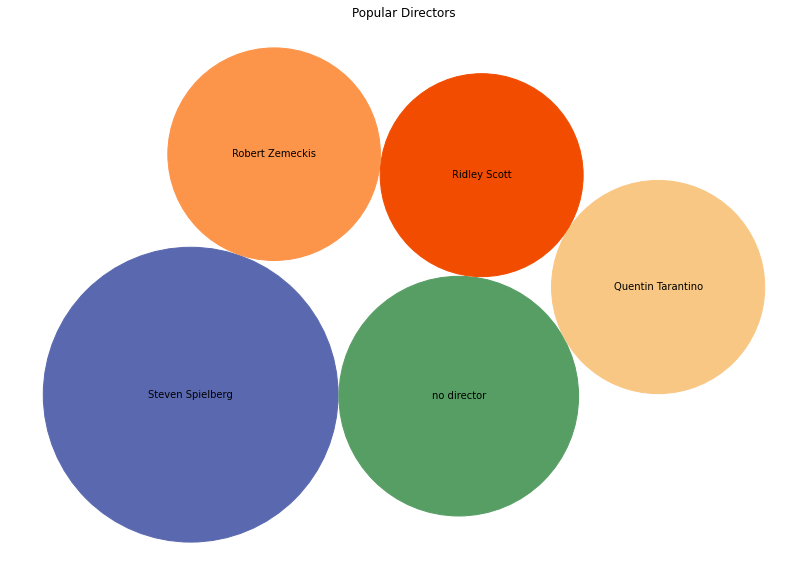

In [87]:
import matplotlib.pyplot as plt
import numpy as np


browser_market_share = {
    'browsers': movie_data['Director'].value_counts().sort(by='count',descending=True)['Director'].to_numpy()[:5],
    'market_share': movie_data['Director'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(15,10))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popular Directors')

plt.show()

Steven Spielberg is the most popular director in the movie set

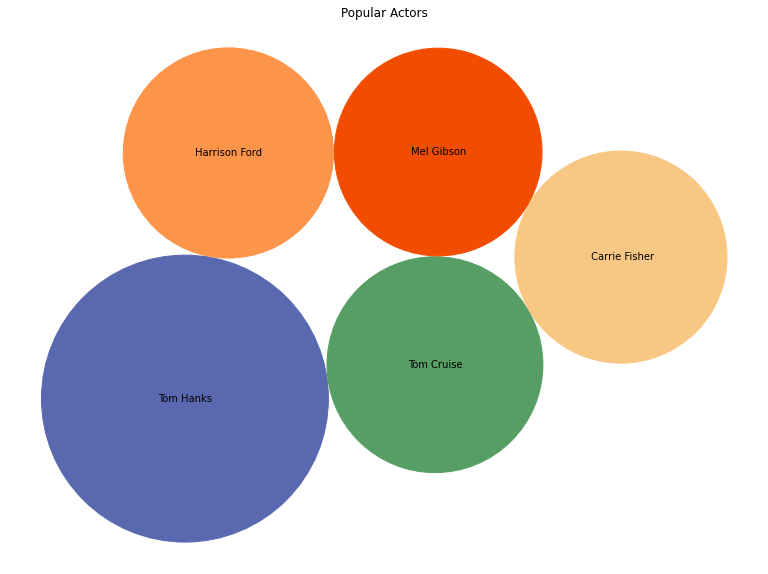

In [86]:
import matplotlib.pyplot as plt
import numpy as np


browser_market_share = {
    'browsers': movie_data.with_columns(pl.col('Actors').str.split(',')).explode('Actors')['Actors'].value_counts().sort(by='count',descending=True)['Actors'].to_numpy()[:5],
    'market_share': movie_data.with_columns(pl.col('Actors').str.split(',')).explode('Actors')['Actors'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(15,10))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popular Actors')

plt.show()

Tom Hanks and Tom Cruise Rank as the most popular actors in the movie data

In [117]:
movie_data.with_columns(pl.col('Language').str.split(',')).explode('Language')['Language'].value_counts().sort(by='count',descending=True)

Language,count
str,u32
"""English""",27653
""" French""",4126
""" Spanish""",3997
""" German""",2494
""" Russian""",2089
""" Italian""",1895
""" Latin""",1190
""" Japanese""",1089
""" Arabic""",841
